# Euclidian distance

I don't really belive that there isn't a function within numpy that doesn't do this but I can't find it through googling

In [1]:
import numpy as np


In [4]:
A = np.array([[2, 3, 4], [4, 5, 6]])
B = np.array([[6, 7, 8], [8, 9, 0]])
A

array([[2, 3, 4],
       [4, 5, 6]])

In [4]:
B

array([[6, 7, 8],
       [8, 9, 0]])

In [6]:
dist_1 = np.sqrt(32)
dist_3 = np.sqrt(20)

In [9]:
C = B - A 

In [10]:
C^2

array([[ 6,  6,  6],
       [ 6,  6, -8]])

In [14]:
C_2 = C**2

In [16]:
ident = np.array([1, 1])
ident

array([1, 1])

In [19]:
np.matmul(C_2.T, ident) ** .5

array([5.65685425, 5.65685425, 7.21110255])

In [20]:
dist_1

5.656854249492381

In [21]:
dist_3

4.47213595499958

In [9]:
def euclidian_dist(A, B):
    """
    Helper function which calculates the euclidian distance between all x, y points in a matrix
    
    runs in O(log n) time 
    
    Input:
    -------
    A, B np.arrays of dimension [2, n]
    """
    C = np.subtract(B, A)
    C_2 = np.square(C)
    dist_2 = np.matmul(C_2.T, np.array([1, 1]))
    return np.sqrt(dist_2)

In [10]:
euclidian_dist(A, B)

array([0.5094668 , 0.69092365, 0.82645307, ..., 0.56088298, 0.67597851,
       0.65024185])

In [7]:
A = np.random.rand(2,3600000)
B = np.random.rand(2, 3600000)

In [16]:
A

array([[0.25981228, 0.92328691, 0.70658252, ..., 0.65953016, 0.63319065,
        0.60597913],
       [0.54344872, 0.83300055, 0.97189666, ..., 0.78626834, 0.52887679,
        0.59620875]])

In [20]:
""" some benchmarking to find out the speed """
import time
x1 = 10000
x2 = 1000000
A = np.random.rand(2, x1)
B = np.random.rand(2, x1)
start2 = time.time()
euclidian_dist(A, B)
end2 = time.time()
A = np.random.rand(2, x2)
B = np.random.rand(2, x2)
start5 = time.time()
euclidian_dist(A, B)
end5 = time.time()
time1 = end2 - start2
time2 = end5 - start5
print(f'time1: {time1}, time2: {time2}')
print(f'difference {time2-time1}, time2/time1 {time2/time1}, x2/x1 {x2/x1}')

time1: 0.0012900829315185547, time2: 0.0579371452331543
difference 0.05664706230163574, time2/time1 44.909628534466826, x2/x1 100.0


# Filtering 

An important step in my process is going to be filtering for all values below the threshold

In [17]:
toy = np.random.rand(1000000000)*10
toy[toy < 5] = np.NaN
np.argwhere(np.isnan(toy))

array([[        0],
       [        1],
       [        7],
       ...,
       [999999996],
       [999999998],
       [999999999]])

In [16]:
toy

array([       nan, 7.31751831,        nan, 6.42807695, 7.62017262,
              nan,        nan, 6.93581959,        nan, 5.28789062])

In [3]:
practice.shape

(17, 2, 3600)

In [2]:
dists, nans = get_distances(right_wrist, .1)

In [3]:
right_wrist.shape

(2, 3600)

In [4]:
get_nan_clusters(nans)
get_part_motion(dists, nans)

9


[(0, array([8]), 78.50168852591123),
 (10, 39, 302.53963470510496),
 (40, 121, 1791.241092680269)]

In [33]:
np.split(nans, np.where(np.diff(np.reshape(nans, nans.shape[0])) != 1)[0]+1)

[array([[9]]),
 array([[39]]),
 array([[ 121],
        [ 122],
        [ 123],
        ...,
        [3595],
        [3596],
        [3597]])]

In [9]:
nans.shape

(3481, 1)

In [12]:
np.reshape(nans, 3481)

array([   9,   39,   72, ..., 3595, 3596, 3597])

In [5]:
dists.shape

(3598,)

In [5]:
import numpy as np
from backend.detect_movement import *
%matplotlib inline
import matplotlib.pyplot as plt
practice = np.load('poses.npy')
right_wrist = practice[10]
np.set_printoptions(threshold=np.inf)

In [6]:
# set up the figure

def draw_motions(motions):
    for part, moves in motions.items():
        fig = plt.figure()
        ax = fig.add_subplot()
        ax.set_xlim(-5,130)
        ax.set_ylim(0,10)
        ax.set_title(part)
        # draw lines
        xmin = 0
        xmax = 125
        y = 5
        height = 1

        plt.hlines(y, xmin, xmax)
        plt.vlines(xmin, y - height / 2., y + height / 2.)
        plt.vlines(xmax, y - height / 2., y + height / 2.)
        for move in moves:
            plt.hlines(y, move[0], move[1], linewidth=move[2], color='red')
        plt.savefig(f'motion_graphs/{part}.png')
        plt.show();

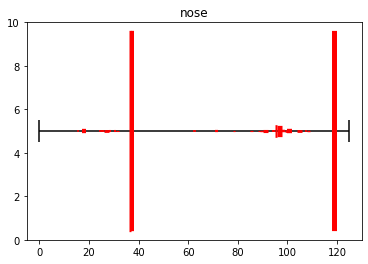

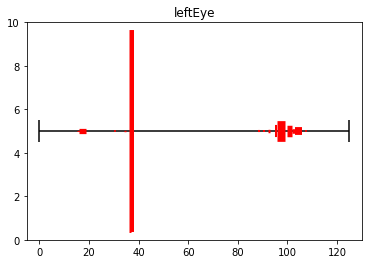

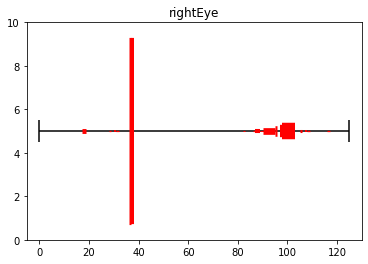

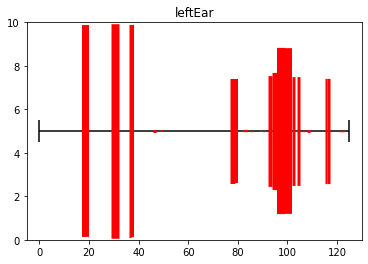

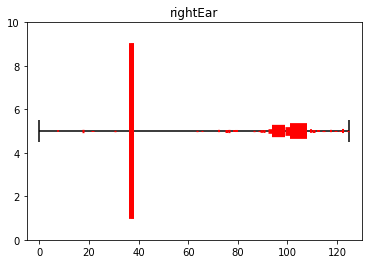

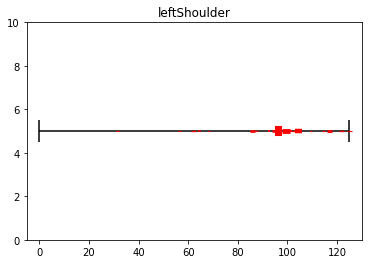

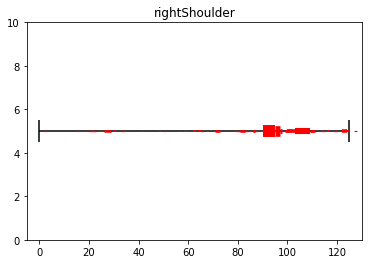

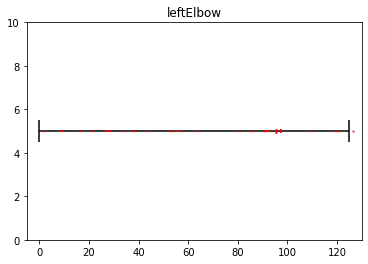

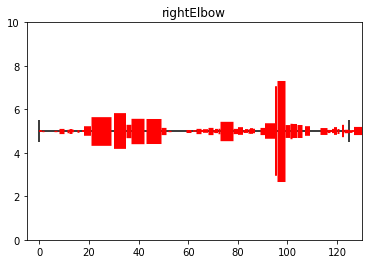

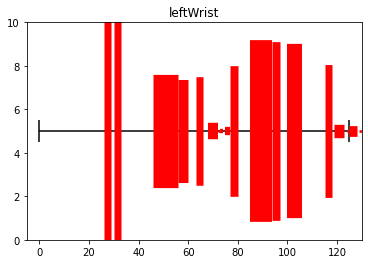

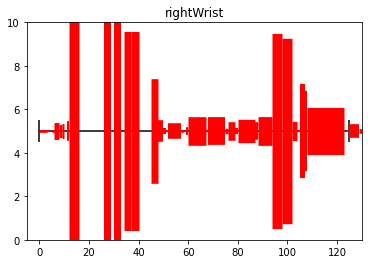

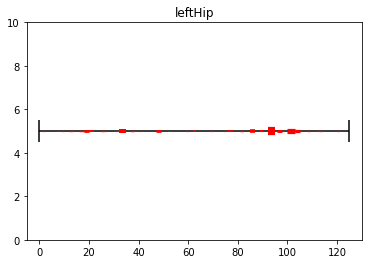

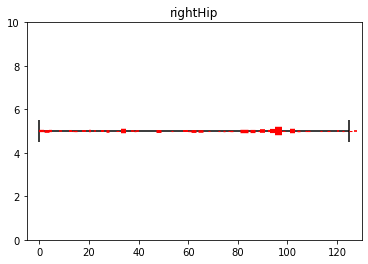

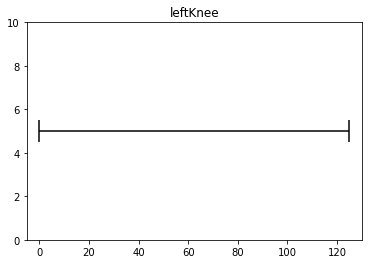

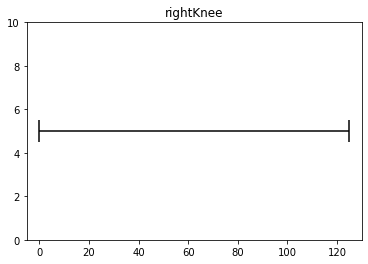

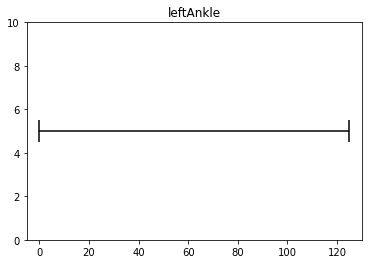

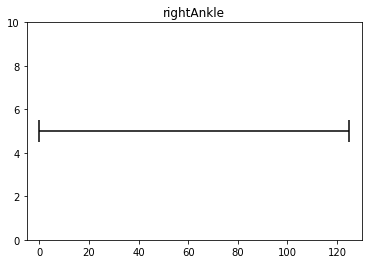

In [8]:
motions = detect_motions(practice, 1)
draw_motions(motions)

In [3]:
dists, nans = get_distances(right_wrist, 1)

In [5]:
pos = np.where(dists > 0)
neg = np.where(dists < 0)

<ipython-input-5-d8c94b54330d>:1: RuntimeWarning: invalid value encountered in greater
  pos = np.where(dists > 0)
<ipython-input-5-d8c94b54330d>:2: RuntimeWarning: invalid value encountered in less
  neg = np.where(dists < 0)


In [16]:
pos_clusters = np.split(pos[0], np.where(np.diff(pos[0]) != 1)[0]+1)
neg_clusters = np.split(neg[0], np.where(np.diff(neg[0]) != 1)[0]+1)

In [17]:
for cluster in pos_clusters:
    print(cluster[0], cluster[-1]+1, sum(dists[cluster[0]:cluster[-1]+1]))
for cluster in neg_clusters:
    print(cluster[0], cluster[-1]+1, sum(dists[cluster[0]: cluster[-1]+1]))

0 1 2.39407554008671
2 3 17.63500593198849
4 5 14.599456643872477
6 7 3.439057784964964
10 12 6.266257859033342
15 16 12.973544678189441
17 18 4.022345070432175
21 24 21.26721145671942
31 32 28.274163580565318
34 35 12.322509902341729
36 37 8.02387962247133
38 39 3.8407079333183085
40 42 38.46602479828856
46 53 79.88681366285932
54 59 102.39301230071474
60 66 128.9329433625258
67 70 33.87161611677796
74 75 7.248593945273249
76 77 1.255167852459656
78 79 44.462096947689204
82 83 58.02626836413059
87 88 75.878039857039
99 105 129.16338449638212
106 108 81.97556489507937
110 111 28.041901648771407
112 113 6.729177773293663
114 115 3.612746575239858
116 117 15.820410363626067
118 119 2.8806664322821645
1 2 -15.840168382499092
3 4 -16.239234015182717
5 6 -4.180635801491226
7 9 -4.1740544258255765
12 15 -16.587688395479617
16 17 -2.108180730770899
18 21 -17.64297507347802
24 31 -84.24120289858345
32 34 -67.46056429461362
35 36 -9.99030294100083
37 38 -7.518100268107576
42 46 -46.376408390643

In [56]:
# Find some data to work with, left wrist appears to have chunks missing and individuals missing
for i in range(17):
    print(PART_MAP[i])
    toy = practice[i]
    missing = np.where(toy[0] == -1) # don't need to actually look at both rows
    print(missing)

nose
(array([], dtype=int64),)
leftEye
(array([], dtype=int64),)
rightEye
(array([], dtype=int64),)
leftEar
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17]),)
rightEar
(array([], dtype=int64),)
leftShoulder
(array([], dtype=int64),)
rightShoulder
(array([], dtype=int64),)
leftElbow
(array([], dtype=int64),)
rightElbow
(array([], dtype=int64),)
leftWrist
(array([], dtype=int64),)
rightWrist
(array([ 0,  1,  2, 10, 14, 15, 16, 17]),)
leftHip
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17]),)
rightHip
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17]),)
leftKnee
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18]),)
rightKnee
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18]),)
leftAnkle
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18]),)
rightAnkle
(array

In [57]:
left_wrist = practice[parts['rightWrist']]
print(left_wrist)
missing = np.where(left_wrist[0] == -1)[0]
miss_clusters = np.split(missing, np.where(np.diff(missing) != 1)[0]+1)

for miss in miss_clusters:
    if len(miss) > 1:
        left_wrist[0][miss] = np.NaN
        left_wrist[1][miss] = np.NaN
    elif len(miss) == 1:
        left = miss[0] - 1
        right = miss[0] + 1
        left_wrist[0][miss] = (left_wrist[0][left] + left_wrist[0][right]) / 2
        left_wrist[1][miss] = (left_wrist[1][left] + left_wrist[1][right]) / 2
print('after')
print(left_wrist)

[[ -1.          -1.          -1.         120.89234823 119.60088233
  120.63333118 120.86650923 120.01778332 120.01778332 119.49779228
   -1.         121.40759895 121.10320214 121.47210147  -1.
   -1.          -1.          -1.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.        

In [47]:
PART_MAP = {0: 'nose',
            1: 'leftEye',
            2: 'rightEye',
            3: 'leftEar',
            4: 'rightEar',
            5: 'leftShoulder',
            6: 'rightShoulder',
            7: 'leftElbow',
            8: 'rightElbow',
            9: 'leftWrist',
            10: 'rightWrist',
            11: 'leftHip',
            12: 'rightHip',
            13: 'leftKnee',
            14: 'rightKnee',
            15: 'leftAnkle',
            16: 'rightAnkle'}
parts = {value: key for key,value in PART_MAP.items()}

In [7]:
parts

{'nose': 0,
 'leftEye': 1,
 'rightEye': 2,
 'leftEar': 3,
 'rightEar': 4,
 'leftShoulder': 5,
 'rightShoulder': 6,
 'leftElbow': 7,
 'rightElbow': 8,
 'leftWrist': 9,
 'rightWrist': 10,
 'leftHip': 11,
 'rightHip': 12,
 'leftKnee': 13,
 'rightKnee': 14,
 'leftAnkle': 15,
 'rightAnkle': 16}